In [239]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


%matplotlib inline

In [240]:
#reading the file and storing in a dataframe
bike_df = pd.read_csv('data/hour_sm.csv')
bike_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1/1/2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,1/1/2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,1/1/2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,1/1/2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,1/1/2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


    - instant: record index
	- dteday : date
	- season : season (1:springer, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- hr : hour (0 to 23)
	- holiday : whether day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered
	

In [241]:
#cleaning the data
#removing few columns
bike_df_mod = bike_df.drop(['instant','yr','casual','registered'], axis = 1)
bike_df_mod.head()

,dteday,season,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1/1/2011,1,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,1/1/2011,1,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,1/1/2011,1,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,1/1/2011,1,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,1/1/2011,1,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


In [242]:
bike_df_mod.count()

dteday        17379
season        17379
mnth          17379
hr            17379
holiday       17379
weekday       17379
workingday    17379
weathersit    17379
temp          17379
atemp         17379
hum           17379
windspeed     17379
cnt           17379
dtype: int64

In [243]:

#temp was normalized by dividing by 41 in original dataset.we are multiplying by 41 to get the real values in C
temp_c=bike_df_mod['temp']*41

#converting to F
temp_f = round((temp_c *9/5) + 32,2)

#writting the temp_f values to the temp_f column
bike_df_mod['temp_f'] = temp_f


#temp was normalized by dividing by 50 in original dataset.we are multiplying by 50 to get the real values in C
atemp_c=bike_df_mod['atemp']*50

#converting to F
atemp_f = round((atemp_c *9/5) + 32,2)

#writting the temp_f values to the temp_f column
bike_df_mod['atemp_f'] = atemp_f


#humidity was normalized by dividing by 100 in original dataset
#we are multiplying by 100 and wriiting it to the column hum1
bike_df_mod['hum1']=bike_df_mod['hum']*100

#windspeed was normalized by dividing by 67 in original dataset.
#we are multiplying by 67 and wriiting it to the column windspeed1
bike_df_mod['winspeed1']=round(bike_df_mod['windspeed']*67,2)

#dropping the original columns temp,atemp, hum, windspeed
bike_data = bike_df_mod.drop(['temp','atemp','hum','windspeed'],axis = 1)
bike_data.head()

,dteday,season,mnth,hr,holiday,weekday,workingday,weathersit,cnt,temp_f,atemp_f,hum1,winspeed1
0,1/1/2011,1,1,0,0,6,0,1,16,49.71,57.91,81.0,0.0
1,1/1/2011,1,1,1,0,6,0,1,40,48.24,56.54,80.0,0.0
2,1/1/2011,1,1,2,0,6,0,1,32,48.24,56.54,80.0,0.0
3,1/1/2011,1,1,3,0,6,0,1,13,49.71,57.91,75.0,0.0
4,1/1/2011,1,1,4,0,6,0,1,1,49.71,57.91,75.0,0.0


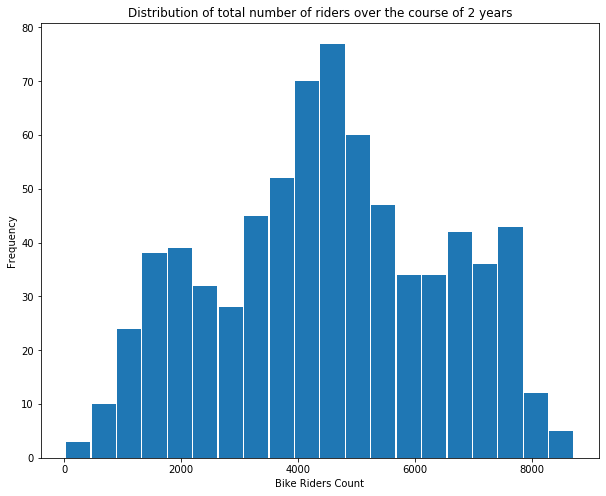

In [54]:
plt.subplots(figsize = (10,8))
count_per_day = bike_data.groupby('dteday')['cnt'].sum()
count_per_day = pd.DataFrame(count_per_day)
plt.hist(count_per_day['cnt'],bins = 20,rwidth=0.95)
plt.xlabel("Bike Riders Count")
plt.ylabel("Frequency")
plt.title("Distribution of total number of riders over the course of 2 years")
plt.savefig('analysis_result/bike_riders_count_distribution.png')

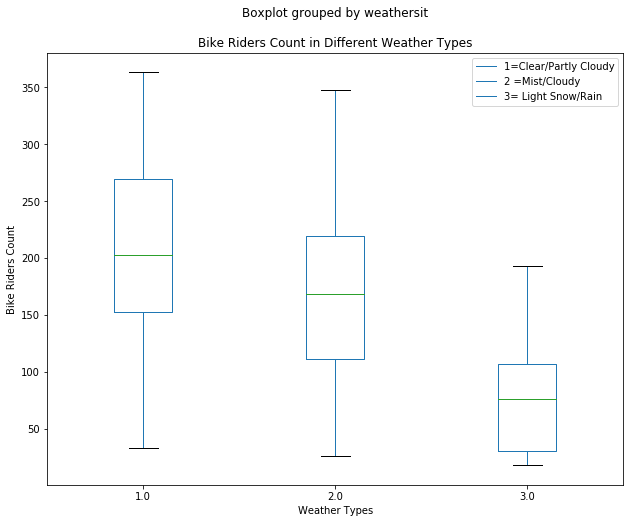

In [413]:
# Now we will see the relation bewteen count and weather

count_per_day_weather = round(bike_data.groupby('dteday').agg({'weathersit':'mean','cnt':'mean'}),0)
count_per_day_weather = pd.DataFrame(count_per_day_weather)

count_per_day_weather.boxplot('cnt',by='weathersit',grid = False, figsize = (10,8))
plt.legend(labels = ['1=Clear/Partly Cloudy','2 =Mist/Cloudy','3= Light Snow/Rain'],loc= 'best')
plt.xlabel("Weather Types")
plt.ylabel("Bike Riders Count")
plt.title("Bike Riders Count in Different Weather Types")
plt.savefig('analysis_result/count_vs_weather.png')


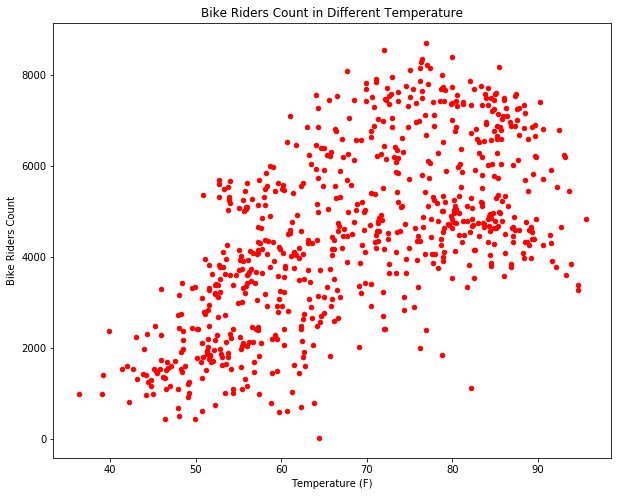

In [245]:
count_temp =round(bike_data.groupby('dteday').agg({'temp_f':'mean','cnt':'sum'}),2)
count_temp = pd.DataFrame(count_temp)
count_temp.plot('temp_f','cnt',kind = 'scatter',color='red',figsize=(10,8))
plt.xlabel("Temperature (F)")
plt.ylabel("Bike Riders Count")
plt.title("Bike Riders Count in Different Temperature")
plt.savefig('analysis_result/Count_vs_Temp.png')

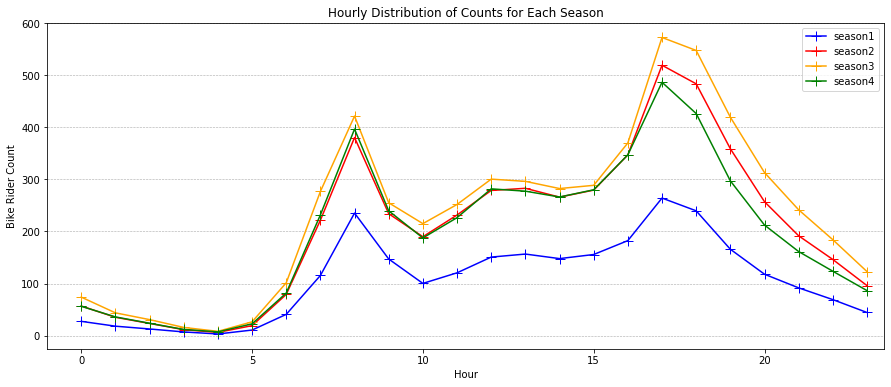

In [303]:
season_hour_count= bike_data.groupby(['season','hr']).agg({'cnt':'mean'})
season_hour_count=pd.DataFrame(season_hour_count)
season_hour_count= season_hour_count.reset_index()
season1 = season_hour_count[season_hour_count['season'] == 1]
season2 = season_hour_count[season_hour_count['season'] == 2]
season3 = season_hour_count[season_hour_count['season'] == 3]
season4 = season_hour_count[season_hour_count['season'] == 4]
plt.figure(figsize=(15,6))
plt.plot(season1['hr'],season1['cnt'],marker = '+',markersize = 10,color = 'blue',alpha= 1,label='season1')
plt.plot(season2['hr'],season2['cnt'],marker = '+',markersize = 10,color = 'red',alpha= 1,label= 'season2')
plt.plot(season3['hr'],season3['cnt'],marker = '+',markersize = 10,color = 'orange',alpha= 1,label = 'season3')
plt.plot(season4['hr'],season4['cnt'],marker = '+',markersize = 10,color = 'green',alpha= 1,label = 'season4')
plt.xlim(-1,23.5)
plt.grid(axis = 'y', linestyle='--', linewidth=0.6)
plt.legend(loc = "best")
plt.xlabel("Hour")
plt.ylabel("Bike Rider Count")
plt.title("Hourly Distribution of Counts for Each Season")

plt.savefig('analysis_result/hourly_distribution_count_seasonwise.png')


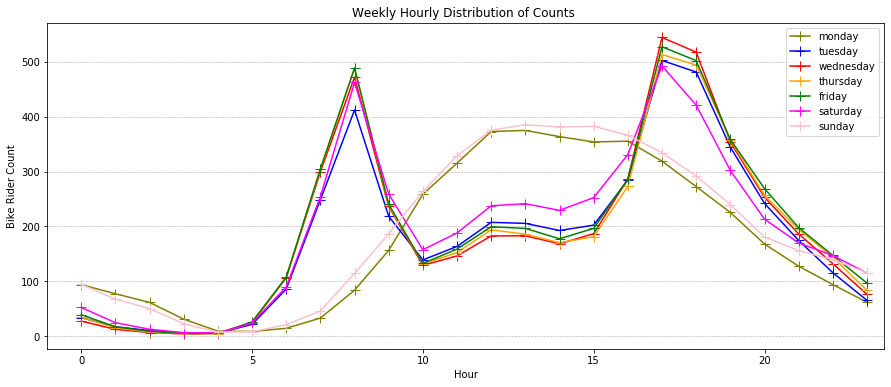

In [304]:
weekday_hour_count= bike_data.groupby(['weekday','hr']).agg({'cnt':'mean'})
weekday_hour_count=pd.DataFrame(weekday_hour_count)
weekday_hour_count= weekday_hour_count.reset_index()

day0 = weekday_hour_count[weekday_hour_count['weekday'] == 0]
day1 = weekday_hour_count[weekday_hour_count['weekday'] == 1]
day2 = weekday_hour_count[weekday_hour_count['weekday'] == 2]
day3 = weekday_hour_count[weekday_hour_count['weekday'] == 3]
day4 = weekday_hour_count[weekday_hour_count['weekday'] == 4]
day5 = weekday_hour_count[weekday_hour_count['weekday'] == 5]
day6 = weekday_hour_count[weekday_hour_count['weekday'] == 6]
plt.figure(figsize=(15,6))

plt.plot(day0['hr'],day0['cnt'],marker = '+',markersize = 10,color = 'olive',alpha= 1,label='monday')
plt.plot(day1['hr'],day1['cnt'],marker = '+',markersize = 10,color = 'blue',alpha= 1,label='tuesday')
plt.plot(day2['hr'],day2['cnt'],marker = '+',markersize = 10,color = 'red',alpha= 1,label= 'wednesday')
plt.plot(day3['hr'],day3['cnt'],marker = '+',markersize = 10,color = 'orange',alpha= 1,label = 'thursday')
plt.plot(day4['hr'],day4['cnt'],marker = '+',markersize = 10,color = 'green',alpha= 1,label = 'friday')
plt.plot(day5['hr'],day5['cnt'],marker = '+',markersize = 10,color = 'magenta',alpha= 1,label = 'saturday')
plt.plot(day6['hr'],day6['cnt'],marker = '+',markersize = 10,color = 'pink',alpha= 1,label = 'sunday')
plt.xlim(-1,23.5)
plt.grid(axis = 'y', linestyle='--', linewidth=0.6)
plt.legend(loc = "best")
plt.xlabel("Hour")
plt.ylabel("Bike Rider Count")
plt.title("Weekly Hourly Distribution of Counts ")
plt.savefig('analysis_result/hourly_distribution_count_weekly.png')

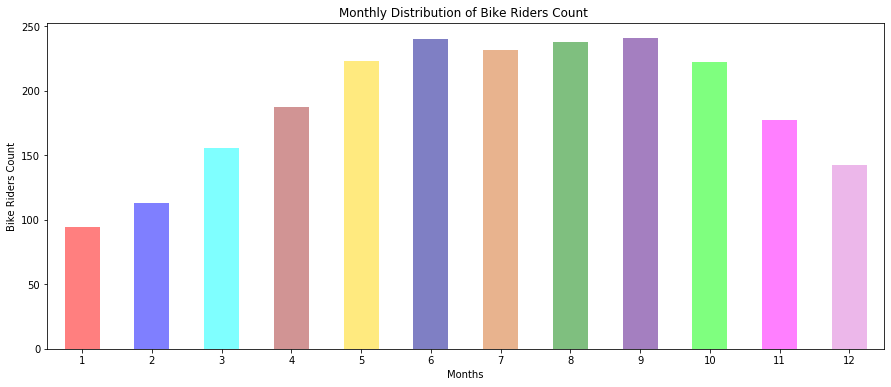

In [343]:
count_per_month = bike_data.groupby('mnth')['cnt'].mean()
count_per_month = pd.DataFrame(count_per_month)
count_per_month= count_per_month.reset_index()
my_colors = ['red','blue','aqua','brown','gold','darkblue','chocolate','green','indigo','lime','magenta','orchid']
my_plot = count_per_month.plot('mnth','cnt',kind= 'bar',figsize = (15,6),color=my_colors,alpha = 0.5,legend = False,rot = 0)
my_plot.set_xlabel("Months")
my_plot.set_ylabel("Bike Riders Count")
my_plot.set_title("Monthly Distribution of Bike Riders Count ")
plt.savefig('analysis_result/monthly_count.png')


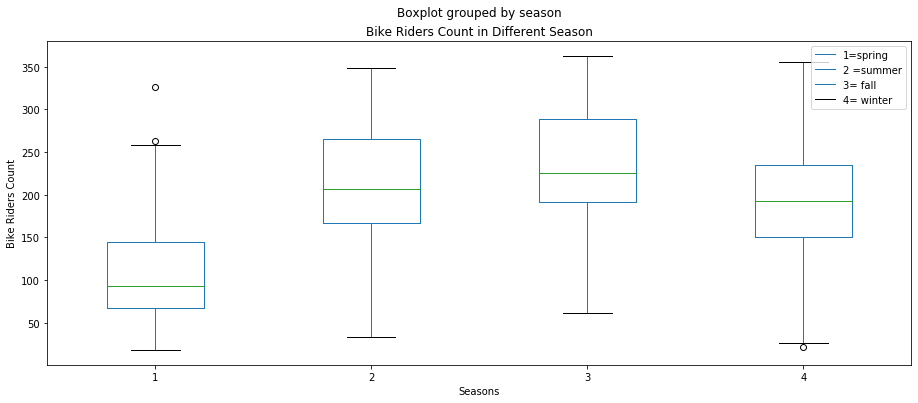

In [417]:
count_per_day_season = round(bike_data.groupby('dteday').agg({'season':'mean','cnt':'mean'}),0)
count_per_day_season = pd.DataFrame(count_per_day_season)

count_per_day_season.boxplot('cnt',by='season',grid = False, figsize = (15,6))
plt.legend(labels = ['1=spring','2 =summer','3= fall','4= winter'],loc = 'upper right')
plt.xlabel("Seasons")
plt.ylabel("Bike Riders Count")
plt.title("Bike Riders Count in Different Season")
plt.savefig('analysis_result/count_vs_season.png')